In [1]:
import pandas as pd
import os
import numpy as np
import scipy as sp
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import pyro
import pyro.distributions as dist
from pyro.distributions import Normal, Uniform, Delta
from pyro.infer.mcmc import MCMC, HMC, NUTS
from pyro.infer.mcmc.api import MCMC
import pyro.poutine as poutine
from pyro.infer import EmpiricalMarginal, SVI, Trace_ELBO, TracePredictive, JitTrace_ELBO
from pyro.optim import Adam
from pyro.infer.mcmc.util import predictive
from pyro.distributions.util import sum_rightmost

In [3]:
from scipy.stats import uniform, norm
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [4]:
# for CI testing
assert pyro.__version__.startswith('0.3.4')
pyro.enable_validation(True)
pyro.set_rng_seed(1)
pyro.enable_validation(True)

In [5]:
A = 1.2
b = -0.3
sigma = 0.2
N = 100

In [6]:
np.random.seed(0)
X = torch.from_numpy(uniform.rvs(size=N))
X.detach()
X = X.float()

In [7]:
e = torch.from_numpy(norm.rvs(loc=0, scale=sigma, size=N)).float()

In [8]:
y = A*X + b + e

In [9]:
y.detach()
y = y.float()

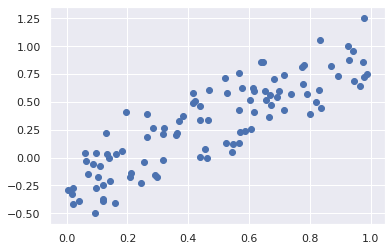

In [10]:
plt.scatter(X.numpy(), y.numpy())

In [11]:
class RegressionModel(nn.Module):
    def __init__(self):
        # p = number of features
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        return self.linear(x)

regression_model = RegressionModel()

In [12]:
loss_fn = torch.nn.MSELoss(reduction='sum')
optim = torch.optim.Adam(regression_model.parameters(), lr=0.01)
num_iterations = 100000

x_data, y_data = X.unsqueeze(1), y

In [13]:
def main():
    x_data = X.unsqueeze(1)
    y_data = y
    for j in range(num_iterations):
        # run the model forward on the data
        y_pred = regression_model(x_data).squeeze(-1)
        # calculate the mse loss
        loss = loss_fn(y_pred, y_data)
        # initialize gradients to zero
        optim.zero_grad()
        # backpropagate
        loss.backward()
        # take a gradient step
        optim.step()
        if (j + 1) % 50 == 0:
            print("[iteration %04d] loss: %.4f" % (j + 1, loss.item()))
    # Inspect learned parameters
    print("Learned parameters:")
    for name, param in regression_model.named_parameters():
        print(name, param.data.numpy())

main()

[iteration 0050] loss: 4.7606
[iteration 0100] loss: 4.4542
[iteration 0150] loss: 4.2221
[iteration 0200] loss: 4.0840
[iteration 0250] loss: 4.0152
[iteration 0300] loss: 3.9857
[iteration 0350] loss: 3.9747
[iteration 0400] loss: 3.9711
[iteration 0450] loss: 3.9701
[iteration 0500] loss: 3.9698
[iteration 0550] loss: 3.9698
[iteration 0600] loss: 3.9698
[iteration 0650] loss: 3.9698
[iteration 0700] loss: 3.9698
[iteration 0750] loss: 3.9698
[iteration 0800] loss: 3.9698
[iteration 0850] loss: 3.9698
[iteration 0900] loss: 3.9698
[iteration 0950] loss: 3.9698
[iteration 1000] loss: 3.9698
[iteration 1050] loss: 3.9698
[iteration 1100] loss: 3.9698
[iteration 1150] loss: 3.9698
[iteration 1200] loss: 3.9698
[iteration 1250] loss: 3.9698
[iteration 1300] loss: 3.9698
[iteration 1350] loss: 3.9698
[iteration 1400] loss: 3.9698
[iteration 1450] loss: 3.9698
[iteration 1500] loss: 3.9698
[iteration 1550] loss: 3.9698
[iteration 1600] loss: 3.9698
[iteration 1650] loss: 3.9698
[iteration

[iteration 14250] loss: 3.9698
[iteration 14300] loss: 3.9698
[iteration 14350] loss: 3.9698
[iteration 14400] loss: 3.9698
[iteration 14450] loss: 3.9698
[iteration 14500] loss: 3.9698
[iteration 14550] loss: 3.9698
[iteration 14600] loss: 3.9698
[iteration 14650] loss: 3.9698
[iteration 14700] loss: 3.9698
[iteration 14750] loss: 3.9698
[iteration 14800] loss: 3.9698
[iteration 14850] loss: 3.9698
[iteration 14900] loss: 3.9698
[iteration 14950] loss: 3.9698
[iteration 15000] loss: 3.9701
[iteration 15050] loss: 3.9698
[iteration 15100] loss: 3.9698
[iteration 15150] loss: 3.9698
[iteration 15200] loss: 3.9698
[iteration 15250] loss: 3.9699
[iteration 15300] loss: 3.9698
[iteration 15350] loss: 3.9698
[iteration 15400] loss: 3.9698
[iteration 15450] loss: 3.9698
[iteration 15500] loss: 3.9698
[iteration 15550] loss: 3.9698
[iteration 15600] loss: 3.9698
[iteration 15650] loss: 3.9698
[iteration 15700] loss: 3.9698
[iteration 15750] loss: 3.9698
[iteration 15800] loss: 3.9698
[iterati

[iteration 27850] loss: 3.9698
[iteration 27900] loss: 3.9698
[iteration 27950] loss: 3.9702
[iteration 28000] loss: 3.9698
[iteration 28050] loss: 3.9698
[iteration 28100] loss: 3.9698
[iteration 28150] loss: 3.9698
[iteration 28200] loss: 3.9698
[iteration 28250] loss: 3.9698
[iteration 28300] loss: 3.9698
[iteration 28350] loss: 3.9698
[iteration 28400] loss: 3.9699
[iteration 28450] loss: 3.9698
[iteration 28500] loss: 3.9698
[iteration 28550] loss: 3.9698
[iteration 28600] loss: 3.9698
[iteration 28650] loss: 3.9698
[iteration 28700] loss: 3.9698
[iteration 28750] loss: 3.9698
[iteration 28800] loss: 3.9698
[iteration 28850] loss: 3.9698
[iteration 28900] loss: 3.9698
[iteration 28950] loss: 3.9698
[iteration 29000] loss: 3.9698
[iteration 29050] loss: 3.9698
[iteration 29100] loss: 3.9698
[iteration 29150] loss: 3.9698
[iteration 29200] loss: 3.9698
[iteration 29250] loss: 3.9698
[iteration 29300] loss: 3.9698
[iteration 29350] loss: 3.9698
[iteration 29400] loss: 3.9698
[iterati

[iteration 41600] loss: 3.9698
[iteration 41650] loss: 3.9698
[iteration 41700] loss: 3.9698
[iteration 41750] loss: 3.9698
[iteration 41800] loss: 3.9698
[iteration 41850] loss: 3.9698
[iteration 41900] loss: 3.9698
[iteration 41950] loss: 3.9698
[iteration 42000] loss: 3.9698
[iteration 42050] loss: 3.9698
[iteration 42100] loss: 3.9698
[iteration 42150] loss: 3.9698
[iteration 42200] loss: 3.9698
[iteration 42250] loss: 3.9698
[iteration 42300] loss: 3.9698
[iteration 42350] loss: 3.9699
[iteration 42400] loss: 3.9698
[iteration 42450] loss: 3.9698
[iteration 42500] loss: 3.9698
[iteration 42550] loss: 3.9698
[iteration 42600] loss: 3.9698
[iteration 42650] loss: 3.9698
[iteration 42700] loss: 3.9698
[iteration 42750] loss: 3.9698
[iteration 42800] loss: 3.9698
[iteration 42850] loss: 3.9699
[iteration 42900] loss: 3.9698
[iteration 42950] loss: 3.9698
[iteration 43000] loss: 3.9698
[iteration 43050] loss: 3.9698
[iteration 43100] loss: 3.9698
[iteration 43150] loss: 3.9698
[iterati

[iteration 55500] loss: 3.9698
[iteration 55550] loss: 3.9698
[iteration 55600] loss: 3.9698
[iteration 55650] loss: 3.9698
[iteration 55700] loss: 3.9698
[iteration 55750] loss: 3.9698
[iteration 55800] loss: 3.9698
[iteration 55850] loss: 3.9698
[iteration 55900] loss: 3.9698
[iteration 55950] loss: 3.9698
[iteration 56000] loss: 3.9698
[iteration 56050] loss: 3.9698
[iteration 56100] loss: 3.9698
[iteration 56150] loss: 3.9698
[iteration 56200] loss: 3.9698
[iteration 56250] loss: 3.9698
[iteration 56300] loss: 3.9698
[iteration 56350] loss: 3.9698
[iteration 56400] loss: 3.9698
[iteration 56450] loss: 3.9698
[iteration 56500] loss: 3.9700
[iteration 56550] loss: 3.9698
[iteration 56600] loss: 3.9698
[iteration 56650] loss: 3.9698
[iteration 56700] loss: 3.9698
[iteration 56750] loss: 3.9698
[iteration 56800] loss: 3.9698
[iteration 56850] loss: 3.9698
[iteration 56900] loss: 3.9698
[iteration 56950] loss: 3.9698
[iteration 57000] loss: 3.9698
[iteration 57050] loss: 3.9698
[iterati

[iteration 69350] loss: 3.9698
[iteration 69400] loss: 3.9698
[iteration 69450] loss: 3.9698
[iteration 69500] loss: 3.9698
[iteration 69550] loss: 3.9698
[iteration 69600] loss: 3.9698
[iteration 69650] loss: 3.9698
[iteration 69700] loss: 3.9698
[iteration 69750] loss: 3.9698
[iteration 69800] loss: 3.9698
[iteration 69850] loss: 3.9698
[iteration 69900] loss: 3.9698
[iteration 69950] loss: 3.9698
[iteration 70000] loss: 3.9698
[iteration 70050] loss: 3.9701
[iteration 70100] loss: 3.9698
[iteration 70150] loss: 3.9698
[iteration 70200] loss: 3.9698
[iteration 70250] loss: 3.9698
[iteration 70300] loss: 3.9698
[iteration 70350] loss: 3.9698
[iteration 70400] loss: 3.9698
[iteration 70450] loss: 3.9698
[iteration 70500] loss: 3.9698
[iteration 70550] loss: 3.9699
[iteration 70600] loss: 3.9698
[iteration 70650] loss: 3.9698
[iteration 70700] loss: 3.9698
[iteration 70750] loss: 3.9698
[iteration 70800] loss: 3.9698
[iteration 70850] loss: 3.9698
[iteration 70900] loss: 3.9698
[iterati

[iteration 83300] loss: 3.9698
[iteration 83350] loss: 3.9698
[iteration 83400] loss: 3.9698
[iteration 83450] loss: 3.9698
[iteration 83500] loss: 3.9698
[iteration 83550] loss: 3.9698
[iteration 83600] loss: 3.9698
[iteration 83650] loss: 3.9698
[iteration 83700] loss: 3.9701
[iteration 83750] loss: 3.9698
[iteration 83800] loss: 3.9698
[iteration 83850] loss: 3.9698
[iteration 83900] loss: 3.9698
[iteration 83950] loss: 3.9698
[iteration 84000] loss: 3.9698
[iteration 84050] loss: 3.9698
[iteration 84100] loss: 3.9698
[iteration 84150] loss: 3.9698
[iteration 84200] loss: 3.9698
[iteration 84250] loss: 3.9698
[iteration 84300] loss: 3.9698
[iteration 84350] loss: 3.9698
[iteration 84400] loss: 3.9698
[iteration 84450] loss: 3.9698
[iteration 84500] loss: 3.9698
[iteration 84550] loss: 3.9698
[iteration 84600] loss: 3.9698
[iteration 84650] loss: 3.9698
[iteration 84700] loss: 3.9698
[iteration 84750] loss: 3.9698
[iteration 84800] loss: 3.9698
[iteration 84850] loss: 3.9698
[iterati

[iteration 96850] loss: 3.9698
[iteration 96900] loss: 3.9698
[iteration 96950] loss: 3.9698
[iteration 97000] loss: 3.9698
[iteration 97050] loss: 3.9698
[iteration 97100] loss: 3.9698
[iteration 97150] loss: 3.9699
[iteration 97200] loss: 3.9698
[iteration 97250] loss: 3.9698
[iteration 97300] loss: 3.9698
[iteration 97350] loss: 3.9698
[iteration 97400] loss: 3.9698
[iteration 97450] loss: 3.9698
[iteration 97500] loss: 3.9698
[iteration 97550] loss: 3.9698
[iteration 97600] loss: 3.9698
[iteration 97650] loss: 3.9698
[iteration 97700] loss: 3.9698
[iteration 97750] loss: 3.9698
[iteration 97800] loss: 3.9698
[iteration 97850] loss: 3.9698
[iteration 97900] loss: 3.9699
[iteration 97950] loss: 3.9698
[iteration 98000] loss: 3.9698
[iteration 98050] loss: 3.9698
[iteration 98100] loss: 3.9698
[iteration 98150] loss: 3.9698
[iteration 98200] loss: 3.9698
[iteration 98250] loss: 3.9698
[iteration 98300] loss: 3.9698
[iteration 98350] loss: 3.9698
[iteration 98400] loss: 3.9703
[iterati

In [14]:
def model(x_data, y_data):
    # weight and bias priors
    w_prior = Normal(torch.zeros(1, 1), torch.ones(1, 1)).to_event(1)
    b_prior = Normal(torch.zeros(1, 1), torch.ones(1, 1)).to_event(1)
    priors = {'linear.weight': w_prior, 'linear.bias': b_prior}
    scale = .2
    # lift module parameters to random variables sampled from the priors
    lifted_module = pyro.random_module("module", regression_model, priors)
    # sample a nn (which also samples w and b)
    lifted_reg_model = lifted_module()
    with pyro.plate("map", len(x_data)):
        # run the nn forward on data
        prediction_mean = lifted_reg_model(x_data).squeeze(-1)
        # condition on the observed data
        pyro.sample("obs",
                    Normal(prediction_mean, scale),
                    obs=y_data)
        return prediction_mean

In [15]:
from pyro.contrib.autoguide import AutoDiagonalNormal
guide = AutoDiagonalNormal(model)

In [16]:
optim = Adam({"lr": 0.03})
svi = SVI(model, guide, optim, loss=Trace_ELBO(), num_samples=1000)


In [17]:
num_iterations = 10000
def train():
    pyro.clear_param_store()
    for j in range(num_iterations):
        # calculate the loss and take a gradient step
        loss = svi.step(x_data, y_data)
        if j % 100 == 0:
            print("[iteration %04d] loss: %.4f" % (j + 1, loss / len(y_data)))

In [18]:
train()

[iteration 0001] loss: 6.5837
[iteration 0101] loss: -0.0799
[iteration 0201] loss: -0.0409
[iteration 0301] loss: 2.2807
[iteration 0401] loss: -0.1368
[iteration 0501] loss: -0.1036
[iteration 0601] loss: -0.1249
[iteration 0701] loss: 0.0542
[iteration 0801] loss: -0.0516
[iteration 0901] loss: -0.1359
[iteration 1001] loss: -0.0241
[iteration 1101] loss: 0.0687
[iteration 1201] loss: -0.1269
[iteration 1301] loss: -0.1245
[iteration 1401] loss: -0.1248
[iteration 1501] loss: -0.0998
[iteration 1601] loss: -0.1302
[iteration 1701] loss: -0.1252
[iteration 1801] loss: -0.1199
[iteration 1901] loss: -0.0758
[iteration 2001] loss: -0.1064
[iteration 2101] loss: -0.0165
[iteration 2201] loss: -0.1260
[iteration 2301] loss: -0.0711
[iteration 2401] loss: -0.1269
[iteration 2501] loss: -0.1129
[iteration 2601] loss: -0.1277
[iteration 2701] loss: -0.1249
[iteration 2801] loss: -0.0882
[iteration 2901] loss: -0.1171
[iteration 3001] loss: -0.1217
[iteration 3101] loss: -0.0961
[iteration 3

In [19]:
for name, value in pyro.get_param_store().items():
    print(name, pyro.param(name))

auto_loc tensor([ 1.2048, -0.2407], requires_grad=True)
auto_scale tensor([0.0302, 0.0178], grad_fn=<AddBackward0>)


In [27]:
get_marginal = lambda traces, sites:EmpiricalMarginal(traces, sites)._get_samples_and_weights()[0].detach().cpu().numpy()

def wrapped_model(x_data, y_data):
    pyro.sample("prediction", Delta(model(x_data, y_data)))

posterior = svi.run(x_data, y_data)

In [28]:
x_test = torch.linspace(0.0, 1.0).unsqueeze(1)

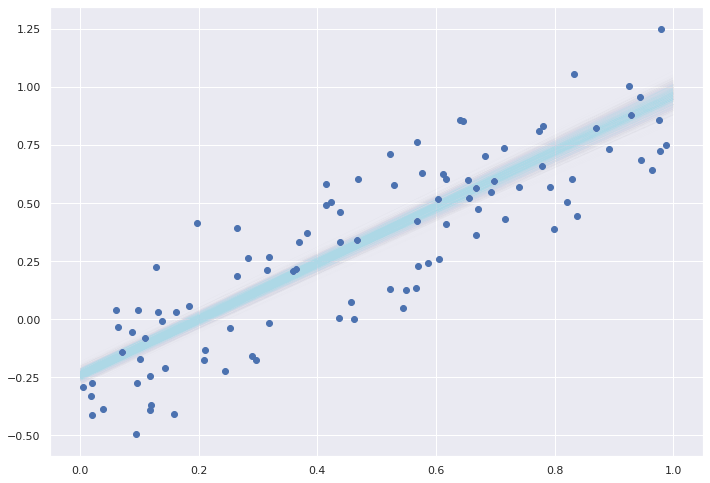

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.scatter(X,y)
for _ in range(1000):
    guide_trace = poutine.trace(guide).get_trace(x_test, None)
    lifted_reg_model = poutine.replay(model, guide_trace)
    y_test = lifted_reg_model(x_test, None)
    plt.plot(x_test.detach().cpu().numpy(), y_test.detach().cpu().numpy(), alpha=0.005, linewidth=1, color='lightblue')